In [1]:
from prody import *

from pylab import *

ion()

@> 10381 atoms and 1 coordinate set(s) were parsed in 0.29s.
@> 10390 atoms and 1 coordinate set(s) were parsed in 0.24s.


<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

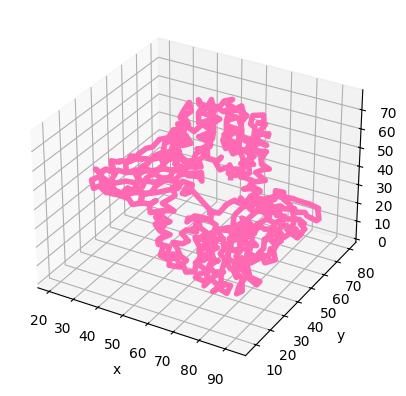

In [2]:
dimer_3b3f_structure = parsePDB('3b3f_dimer_InitFrame.pdb')

dimer_3b3f_CA = dimer_3b3f_structure.select('calpha')


dimer_3b3j_structure = parsePDB('3b3j_dimer_InitFrame.pdb')

dimer_3b3j_CA = dimer_3b3j_structure.select('calpha')

showProtein(dimer_3b3f_structure)

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

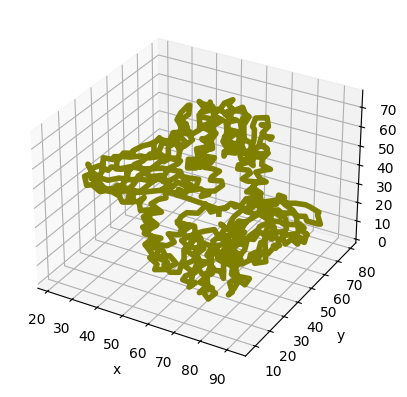

In [3]:
showProtein(dimer_3b3j_structure)

In [5]:
dimer_3b3f_dcd = DCDFile('../../3b3f/dimer/analysis/aligned_3b3f_dimer_md400_ski10.dcd')

dimer_3b3f_dcd.link(dimer_3b3f_structure)

dimer_3b3f_dcd.setAtoms(dimer_3b3f_structure)

dimer_3b3f_dcd.setCoords(dimer_3b3f_structure)

dimer_3b3f_dcd

<DCDFile: aligned_3b3f_dimer_md400_ski10 (linked to AtomGroup 3b3f_dimer_InitFrame; next 0 of 4000 frames; 10381 atoms)>

In [6]:
dimer_3b3j_dcd = DCDFile('../../3b3j/dimer/analysis/aligned_3b3j_dimer_md400_ski10.dcd')

dimer_3b3j_dcd.link(dimer_3b3j_structure)

dimer_3b3j_dcd.setAtoms(dimer_3b3j_structure)

dimer_3b3j_dcd.setCoords(dimer_3b3j_structure)

dimer_3b3j_dcd

<DCDFile: aligned_3b3j_dimer_md400_ski10 (linked to AtomGroup 3b3j_dimer_InitFrame; next 0 of 4000 frames; 10390 atoms)>

In [7]:
dimer_3b3f_dcd.setAtoms(dimer_3b3f_structure.calpha)
repr(dimer_3b3f_dcd)

'<DCDFile: aligned_3b3f_dimer_md400_ski10 (linked to AtomGroup 3b3f_dimer_InitFrame; next 0 of 4000 frames; selected 652 of 10381 atoms)>'

In [8]:
dimer_3b3j_dcd.setAtoms(dimer_3b3j_structure.calpha)
repr(dimer_3b3j_dcd)

'<DCDFile: aligned_3b3j_dimer_md400_ski10 (linked to AtomGroup 3b3j_dimer_InitFrame; next 0 of 4000 frames; selected 652 of 10390 atoms)>'

In [9]:
dimer_3b3f_pca = PCA('Active dimer PCA')

dimer_3b3f_pca.buildCovariance(dimer_3b3f_dcd)

dimer_3b3f_pca.calcModes()

repr(dimer_3b3f_pca)

@> Covariance will be calculated using 4000 frames.
@> Covariance matrix calculated in 100.374511s.
@> 20 modes were calculated in 9.79s.


'<PCA: Active dimer PCA (20 modes; 652 atoms)>'

In [10]:
dimer_3b3j_pca = PCA('Inactive dimer PCA')

dimer_3b3j_pca.buildCovariance(dimer_3b3j_dcd)

dimer_3b3j_pca.calcModes()

repr(dimer_3b3j_pca)

@> Covariance will be calculated using 4000 frames.
@> Covariance matrix calculated in 102.696439s.
@> 20 modes were calculated in 8.56s.


'<PCA: Inactive dimer PCA (20 modes; 652 atoms)>'

In [11]:
writeNMD('dimer_3b3f_pca10.nmd', dimer_3b3f_pca[:9], dimer_3b3f_CA)

'dimer_3b3f_pca10.nmd'

In [12]:
writeNMD('dimer_3b3j_pca10.nmd', dimer_3b3j_pca[:9], dimer_3b3j_CA)

'dimer_3b3j_pca10.nmd'

In [13]:
for mode in dimer_3b3f_pca[:9]:
    print(calcFractVariance(mode).round(3))

0.396
0.179
0.047
0.03
0.021
0.019
0.017
0.015
0.013


In [14]:
for mode in dimer_3b3j_pca[:9]:
    print(calcFractVariance(mode).round(3))

0.477
0.113
0.078
0.048
0.031
0.017
0.015
0.015
0.013


## ANM  calculation

In [15]:
activeDimer = parsePDB('3b3f_AB_Nter_trimmed_noSAH.pdb', compressed=False)
activeDimer_ca = activeDimer.select('calpha')


inactiveDimer = parsePDB('3b3j_clean_dimer_Nter_trimmed.pdb', compressed=False)
inactiveDimer_ca = inactiveDimer.select('calpha')

@> 5222 atoms and 1 coordinate set(s) were parsed in 0.16s.
@> 5222 atoms and 1 coordinate set(s) were parsed in 0.13s.


In [16]:
anm_activeDimer_ca = ANM('Active_Dimer_3b3f')
anm_activeDimer_ca.buildHessian(activeDimer_ca)
anm_activeDimer_ca.calcModes()

@> Hessian was built in 0.94s.
@> 20 modes were calculated in 8.47s.


In [17]:
anm_inactiveDimer_ca = ANM('Inactive_Dimer_3b3f')
anm_inactiveDimer_ca.buildHessian(inactiveDimer_ca)
anm_inactiveDimer_ca.calcModes()

@> Hessian was built in 1.02s.
@> 20 modes were calculated in 7.39s.


## Compare with ANM results

In [18]:
printOverlapTable(dimer_3b3f_pca[:20], anm_activeDimer_ca[:20])

Overlap Table
                                                                                    ANM Active_Dimer_3b3f
                            #1     #2     #3     #4     #5     #6     #7     #8     #9    #10    #11    #12    #13    #14    #15    #16    #17    #18    #19    #20
PCA Active dimer PCA #1   -0.19  -0.16  +0.03  -0.16  -0.21  +0.22  +0.01  -0.12  -0.07  -0.02  +0.02  +0.07  +0.27  +0.02  +0.10  -0.05  -0.03  +0.01  +0.05  +0.05
PCA Active dimer PCA #2   -0.22  +0.16  -0.16  +0.06  -0.11  +0.16  -0.01  -0.06  -0.20  +0.12  +0.03  -0.07  +0.11  +0.31  -0.04  +0.13  +0.04  -0.23  -0.17  -0.11
PCA Active dimer PCA #3   +0.09  +0.12  -0.33  -0.01  -0.05  -0.07  -0.06  +0.01  -0.08  -0.02  +0.01  -0.12   0.00  +0.05  -0.15  -0.10   0.00  +0.03  -0.14  -0.01
PCA Active dimer PCA #4   +0.13  -0.14  -0.26  +0.10  +0.17  -0.09  -0.26  -0.06  -0.11  +0.21  +0.22  +0.03  -0.18  -0.09  +0.16  -0.01  +0.01  +0.19  +0.03  -0.03
PCA Active dimer PCA #5   +0.10  +0.11  -0.15  -0.46  -0

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


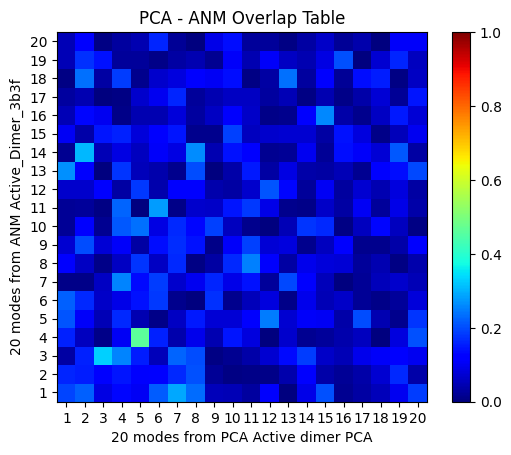

In [21]:
showOverlapTable(dimer_3b3f_pca[:20], anm_activeDimer_ca[:20])
title('PCA - ANM Overlap Table');

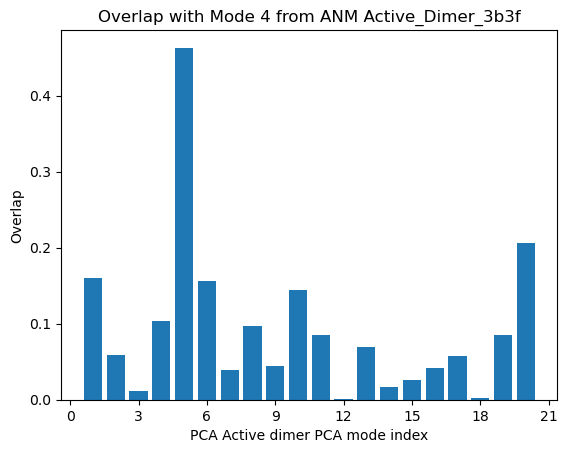

In [40]:
showOverlap(anm_activeDimer_ca[3], dimer_3b3f_pca);

In [22]:
printOverlapTable(dimer_3b3j_pca[:20], anm_inactiveDimer_ca[:20])

Overlap Table
                                                                                     ANM Inactive_Dimer_3b3f
                              #1     #2     #3     #4     #5     #6     #7     #8     #9    #10    #11    #12    #13    #14    #15    #16    #17    #18    #19    #20
PCA Inactive dimer PCA #1   -0.19  -0.17  -0.34  +0.03  +0.02  +0.03  +0.13  -0.02  -0.28  -0.13  +0.11  +0.02  -0.08  +0.08  -0.23  -0.15  -0.10  +0.01   0.00   0.00
PCA Inactive dimer PCA #2   -0.24  +0.05  -0.06  +0.33  -0.05  -0.01  -0.08  +0.07  -0.01  +0.10  +0.05  -0.01  -0.08  -0.02  +0.02  -0.21  +0.18  +0.11  +0.14  -0.06
PCA Inactive dimer PCA #3    0.00  -0.35  -0.12  +0.04  +0.07  +0.08  +0.02  -0.06  +0.02  +0.10  +0.05  +0.13  -0.12  +0.11  -0.12  -0.14  +0.04  -0.09  +0.02  -0.06
PCA Inactive dimer PCA #4    0.00  +0.05  +0.11  -0.20  -0.05  +0.25  -0.05  +0.04  -0.06  -0.13  -0.12  +0.04  +0.03  +0.21  -0.02  +0.01  +0.07  +0.04  -0.09  -0.11
PCA Inactive dimer PCA #5   -0.07  -0.07  +

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


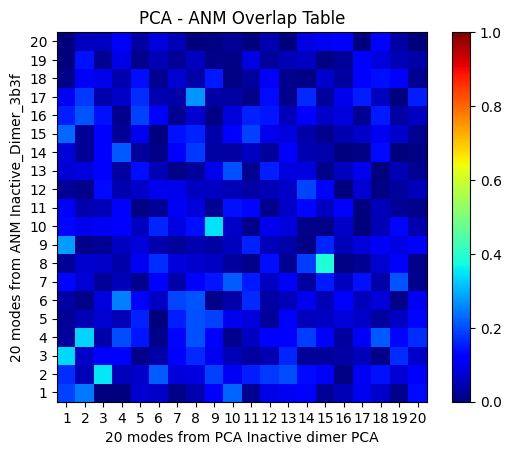

In [23]:
showOverlapTable(dimer_3b3j_pca[:20], anm_inactiveDimer_ca[:20])
title('PCA - ANM Overlap Table');